In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 打开文件
path = "./MRT_raw_data"
dirs = os.listdir( path )
covid = pd.read_csv('COVID_cooked_data/COVID_cases_per_day_policy.csv')
covid.head(5)

,日期,累積確診人數,確診人數,經濟防疫新模式,二級警戒,三級警戒,是否7+7,是否3+4,首例確診,口罩實名制,簡訊實聯制上路,Delta變異株,Omicron亞型變異株
0,2017-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-02,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-03,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-04,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-05,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
for file in dirs : 
    df = pd.read_csv(f"MRT_raw_data/{file}") 
    influx = df.groupby(['日期','進站','時段']).sum() #進站人次
    outflux = df.groupby(['日期','出站','時段']).sum() #出站人次
    
    influx_index = np.array([*influx.index]) # https://blog.csdn.net/weixin_42423817/article/details/118793657?spm=1001.2101.3001.6650.13&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7Edefault-13-118793657-blog-80330077.pc_relevant_multi_platform_whitelistv2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7Edefault-13-118793657-blog-80330077.pc_relevant_multi_platform_whitelistv2&utm_relevant_index=19
    influx_index = pd.DataFrame(influx_index) # 把 index 分離出來 變成一欄 dataframe
    
    in_cnt=pd.DataFrame(influx.values) # 把 in 的 value 分離出來 變成 dataframe
    out_cnt=pd.DataFrame(outflux.values) # 把 out 的 value 分離出來 變成 dataframe
    
    cooked = pd.concat([influx_index, in_cnt, out_cnt] , axis=1) # 合併 index, in的value, out的value
    cooked.columns = ['日期','站名','時段','進站','出站'] # 設定欄位名稱
    
    df_each_station = cooked.groupby(['日期','站名']).sum() # 只需要每日每站總流量
    df_each_station = df_each_station[["進站", "出站"]]
    
    influx_index = np.array([*df_each_station.index])
    influx_index = pd.DataFrame(influx_index)
    
    in_cnt = pd.DataFrame(df_each_station['進站'].values)
    out_cnt = pd.DataFrame(df_each_station['出站'].values)
    
    cooked_each_station = pd.concat([influx_index, in_cnt, out_cnt] , axis=1)
    cooked_each_station.columns = ['日期','站名','進站','出站']
    cooked_each_station = pd.merge(cooked_each_station,covid, how='inner', on=['日期'])
    print(file)
    if not os.path.isdir('MRT_cooked_data'):
        os.mkdir('MRT_cooked_data')
    cooked_each_station.to_csv(f"COVID_cooked_data/covid_MRT_by_day_{file}", index=False)

201701.csv
201702.csv
201703.csv
201704.csv
201705.csv
201706.csv
201707.csv
201708.csv
201709.csv
201710.csv
201711.csv
201712.csv
201801.csv
201802.csv
201803.csv
201804.csv
201805.csv
201806.csv
201807.csv
201808.csv
201809.csv
201810.csv
201811.csv
201812.csv
201901.csv
201902.csv
201903.csv
201904.csv
201905.csv
201906.csv
201907.csv
201908.csv
201909.csv
201910.csv
201911.csv
201912.csv
202001.csv
202002.csv
202003.csv
202004.csv
202005.csv
202006.csv
202007.csv
202008.csv
202009.csv
202010.csv
202011.csv
202012.csv
202101.csv
202102.csv
202103.csv
202104.csv
202105.csv
202106.csv
202107.csv
202108.csv
202109.csv
202110.csv
202111.csv
202112.csv
202201.csv
202202.csv
202203.csv
202204.csv
202205.csv
202206.csv
202207.csv


KeyError: '日期'

In [6]:
#files = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207']
files = ['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207']

df_all = pd.read_csv(f"Traffic_covid_data/covid_MRT_by_day_202001.csv")
for f in files[1:]:
    df = pd.read_csv(f"Traffic_covid_data/covid_MRT_by_day_{f}.csv")
    df_all = pd.concat([df_all,df], ignore_index=True)
    if not os.path.isdir('Merged_covid_data'):
        os.mkdir('Merged_covid_data')
    df_all.to_csv(f"Merged_covid_data/Merged_covid_traffic_2020_2022.csv", index=False)
    
    print(f,"stacked")
print(df_all.shape[0])

202002 stacked
202003 stacked
202004 stacked
202005 stacked
202006 stacked
202007 stacked
202008 stacked
202009 stacked
202010 stacked
202011 stacked
202012 stacked
202101 stacked
202102 stacked
202103 stacked
202104 stacked
202105 stacked
202106 stacked
202107 stacked
202108 stacked
202109 stacked
202110 stacked
202111 stacked
202112 stacked
202201 stacked
202202 stacked
202203 stacked
202204 stacked
202205 stacked
202206 stacked
202207 stacked
112455


In [7]:
df = pd.read_csv('Merged_covid_data/Merged_covid_traffic_2020_2022.csv')
df

,日期,站名,進站,出站,累積確診人數,確診人數,經濟防疫新模式,二級警戒,三級警戒,是否7+7,是否3+4,首例確診,口罩實名制,簡訊實聯制上路,Delta變異株,Omicron亞型變異株
0,2020-01-01,BL板橋,41694,44285,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-01,Y板橋,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-01,七張,12230,12328,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-01,三和國中,8912,8916,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-01,三民高中,8601,8878,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112450,2022-07-31,頂埔,4526,4492,4603090,16567,1,0,0,0,1,1,0,0,1,1
112451,2022-07-31,頂溪,18613,19699,4603090,16567,1,0,0,0,1,1,0,0,1,1
112452,2022-07-31,頭前庄,3105,3348,4603090,16567,1,0,0,0,1,1,0,0,1,1
112453,2022-07-31,麟光,2972,2983,4603090,16567,1,0,0,0,1,1,0,0,1,1


In [8]:
df.columns = ["date", "Station", "in", "out", "cumulative.confirmed", "confirmed", "eco", "Level2", "Level3", "7+7","3+4", "first.confirmed.case","mask", "message", "Delta", "Omicron"]
df2 = df[["in", "out", "cumulative.confirmed", "confirmed", "eco", "Level2", "Level3", "7+7","3+4", "first.confirmed.case","mask", "message", "Delta", "Omicron"]]
df2

,in,out,cumulative.confirmed,confirmed,eco,Level2,Level3,7+7,3+4,first.confirmed.case,mask,message,Delta,Omicron
0,41694,44285,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12230,12328,0,0,0,0,0,0,0,0,0,0,0,0
3,8912,8916,0,0,0,0,0,0,0,0,0,0,0,0
4,8601,8878,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112450,4526,4492,4603090,16567,1,0,0,0,1,1,0,0,1,1
112451,18613,19699,4603090,16567,1,0,0,0,1,1,0,0,1,1
112452,3105,3348,4603090,16567,1,0,0,0,1,1,0,0,1,1
112453,2972,2983,4603090,16567,1,0,0,0,1,1,0,0,1,1


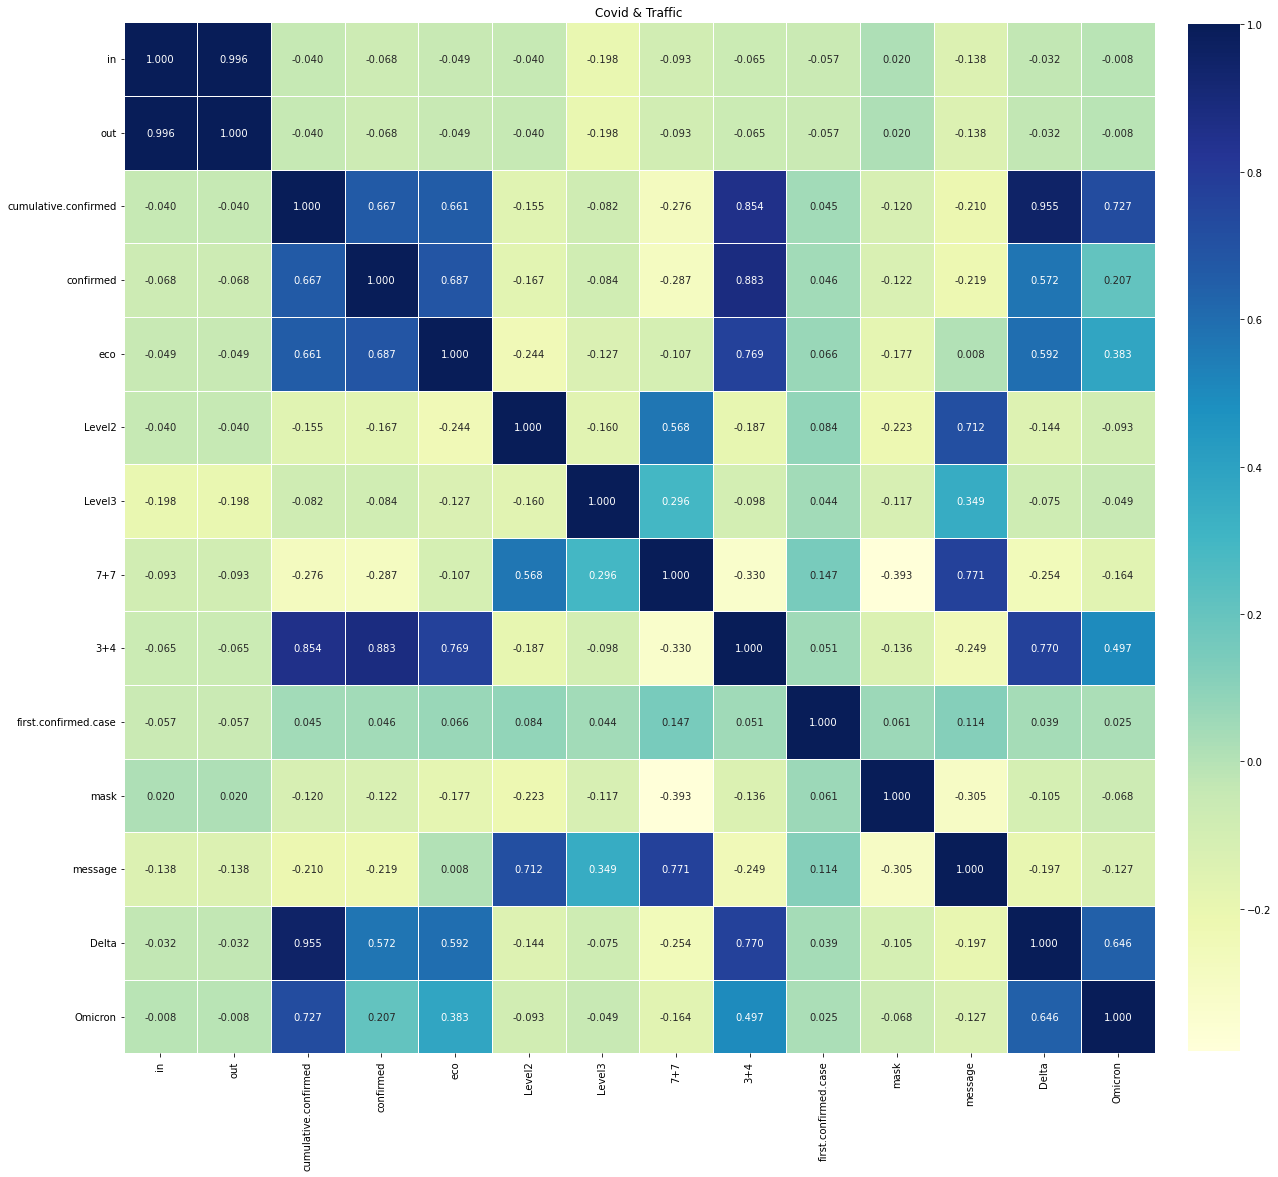

In [9]:
datacor = np.corrcoef(df2, rowvar=0)
datacor = pd.DataFrame(data=datacor, columns=df2.columns, index=df2.columns)
plt.figure(figsize=(20,20))
ax = sns.heatmap(datacor, square=True, annot=True, fmt=".3f", linewidths=.5,cmap="YlGnBu", cbar_kws={"fraction":0.046, "pad":0.03})
ax.set_title("Covid & Traffic")
plt.show()